# Library Importing

In [ ]:
import pandas as pd
import numpy as np
import warnings
import scipy
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA

# Forceasting with ARIMA model
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# For marchine Learning Approach
from statsmodels.tsa.tsatools import lagmat
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')


# Data Importing & Data Cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data
train = pd.read_csv("/content/drive/MyDrive/My files holder/train_1.csv")

In [ ]:
train

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_flattened = pd.melt(train[list(train.columns[-50: ])+['Page']], id_vars='Page', var_name='date', value_name='Visits')



In [ ]:
train_flattened.head()

,Page,date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2016-11-12,13.0
1,2PM_zh.wikipedia.org_all-access_spider,2016-11-12,12.0
2,3C_zh.wikipedia.org_all-access_spider,2016-11-12,6.0
3,4minute_zh.wikipedia.org_all-access_spider,2016-11-12,38.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2016-11-12,13.0


In [ ]:
# train_flattened[ -10:]

In [ ]:
train_flattened.shape

(7253150, 3)

In [ ]:
train_flattened = train_flattened.dropna()

In [ ]:
train_flattened.shape

(7053930, 3)

In [ ]:
# Median by page
df_median = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].median())
df_median.columns = ['median']

# Average by page
df_mean = pd.DataFrame(train_flattened.groupby(['Page'])['Visits'].mean())
df_mean.columns = ['mean']

# Merging data
train_flattened = train_flattened.set_index('Page').join(df_mean).join(df_median)

In [ ]:
train_flattened.head()

,date,Visits,mean,median
Page,,,,
!vote_en.wikipedia.org_all-access_all-agents,2016-11-12,2.0,2.836735,2.0
!vote_en.wikipedia.org_all-access_all-agents,2016-11-13,2.0,2.836735,2.0
!vote_en.wikipedia.org_all-access_all-agents,2016-11-14,4.0,2.836735,2.0
!vote_en.wikipedia.org_all-access_all-agents,2016-11-15,8.0,2.836735,2.0
!vote_en.wikipedia.org_all-access_all-agents,2016-11-16,3.0,2.836735,2.0


In [ ]:
train_flattened.shape

(7053930, 4)

In [ ]:
train_flattened.reset_index(drop=False,inplace=True)

In [ ]:
# train_flattened.head()

In [ ]:
# train_flattened.shape

In [ ]:
# Feature engineering with the date


train_flattened['date'] = train_flattened['date'].astype('datetime64[ns]')
train_flattened['weekday'] = train_flattened.date.dt.dayofweek
# Same result different way
# train_flattened['weekday'] = train_flattened['date'].apply(lambda x: x.weekday())
train_flattened['weekend'] = ((train_flattened.date.dt.dayofweek) // 5 == 1).astype(float)
train_flattened['year']=train_flattened.date.dt.year
train_flattened['month']=train_flattened.date.dt.month
train_flattened['day']=train_flattened.date.dt.day

In [ ]:
train_flattened.head()

,Page,date,Visits,mean,median,weekday,weekend,year,month,day
0,!vote_en.wikipedia.org_all-access_all-agents,2016-11-12,2.0,2.836735,2.0,5,1.0,2016,11,12
1,!vote_en.wikipedia.org_all-access_all-agents,2016-11-13,2.0,2.836735,2.0,6,1.0,2016,11,13
2,!vote_en.wikipedia.org_all-access_all-agents,2016-11-14,4.0,2.836735,2.0,0,0.0,2016,11,14
3,!vote_en.wikipedia.org_all-access_all-agents,2016-11-15,8.0,2.836735,2.0,1,0.0,2016,11,15
4,!vote_en.wikipedia.org_all-access_all-agents,2016-11-16,3.0,2.836735,2.0,2,0.0,2016,11,16


In [ ]:
train_flattened.shape

(7053930, 10)

This part allowed us to prepare our data. We had created new features that we use in the next steps. Days, Months, Years are interesting to forecast with a Machine Learning Approach or to do an analysis.
If you have another idea to improve this first part: Fork this notebook and improve it or share your idea in the comments.

# Data Aggregation & Visualisation

In [ ]:
train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].mean()

date
2016-11-12    1536.471757
2016-11-13    1679.630589
2016-11-14    1701.941831
2016-11-15    1564.172228
2016-11-16    1520.673959
2016-11-17    1463.751937
2016-11-18    1396.544145
2016-11-19    1399.170412
2016-11-20    1482.018739
2016-11-21    1529.844585
2016-11-22    1526.723944
2016-11-23    1444.043898
2016-11-24    1373.814638
2016-11-25    1326.709107
2016-11-26    1472.107224
2016-11-27    1583.903133
2016-11-28    1460.719082
2016-11-29    1533.142157
2016-11-30    1400.355717
2016-12-01    1389.007191
2016-12-02    1349.266773
2016-12-03    1440.036531
2016-12-04    1525.511597
2016-12-05    1513.758528
2016-12-06    1495.341920
2016-12-07    1444.830664
2016-12-08    1416.289162
2016-12-09    1369.501143
2016-12-10    1360.451215
2016-12-11    1439.703425
2016-12-12    1457.877654
2016-12-13    1393.217357
2016-12-14    1456.495662
2016-12-15    1338.356251
2016-12-16    1265.571850
2016-12-17    1280.523597
2016-12-18    1474.682207
2016-12-19    1561.789931
2016-12

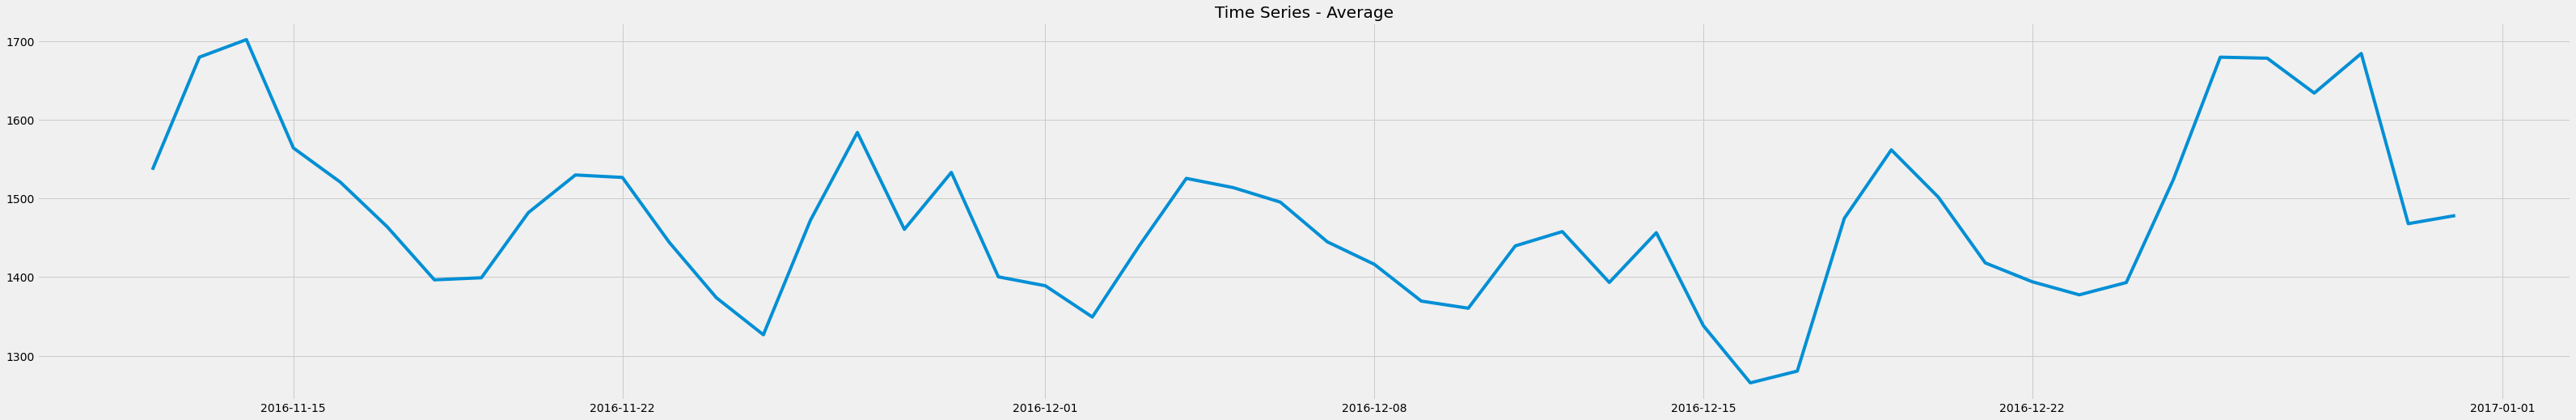

In [ ]:
plt.figure(figsize=(50, 8))
mean_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].mean()
plt.plot(mean_group)
plt.title('Time Series - Average')
plt.show()

In [ ]:
train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].median()

date
2016-11-12    167.0
2016-11-13    182.0
2016-11-14    168.0
2016-11-15    163.5
2016-11-16    163.0
2016-11-17    160.0
2016-11-18    157.0
2016-11-19    166.0
2016-11-20    180.0
2016-11-21    165.0
2016-11-22    161.0
2016-11-23    162.0
2016-11-24    153.0
2016-11-25    151.0
2016-11-26    161.0
2016-11-27    181.0
2016-11-28    161.0
2016-11-29    160.0
2016-11-30    157.0
2016-12-01    153.0
2016-12-02    154.0
2016-12-03    157.0
2016-12-04    176.0
2016-12-05    163.0
2016-12-06    160.0
2016-12-07    158.0
2016-12-08    156.0
2016-12-09    153.0
2016-12-10    156.0
2016-12-11    172.0
2016-12-12    162.0
2016-12-13    159.0
2016-12-14    156.0
2016-12-15    150.0
2016-12-16    146.0
2016-12-17    150.0
2016-12-18    166.0
2016-12-19    161.0
2016-12-20    155.0
2016-12-21    151.0
2016-12-22    149.0
2016-12-23    143.0
2016-12-24    132.0
2016-12-25    145.0
2016-12-26    160.0
2016-12-27    162.0
2016-12-28    163.0
2016-12-29    160.0
2016-12-30    154.0
2016-12-31    1

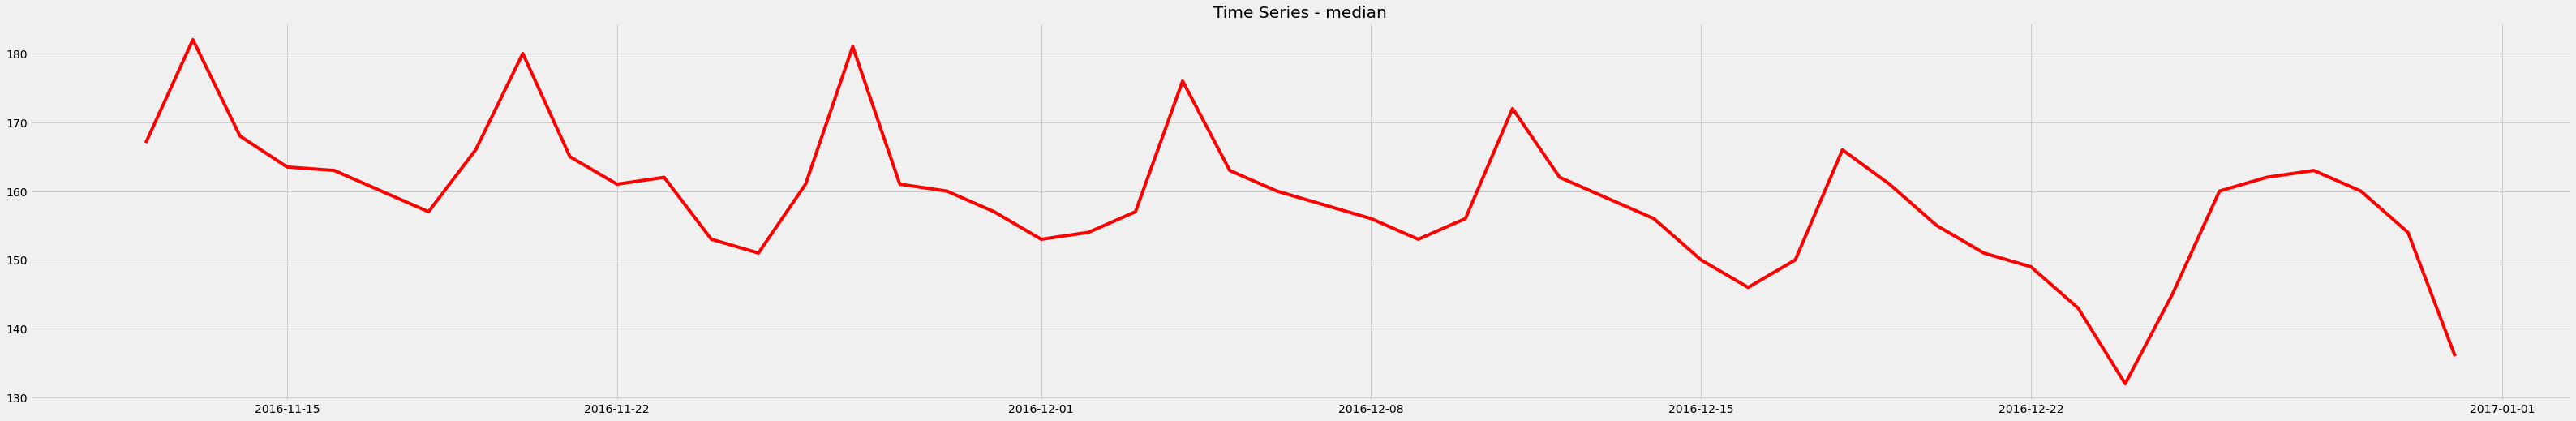

In [ ]:
plt.figure(figsize=(50, 8))
median_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].median()
plt.plot(median_group, color = 'r')
plt.title('Time Series - median')
plt.show()

In [ ]:
train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].std()

date
2016-11-12    83304.139499
2016-11-13    86720.870540
2016-11-14    91624.464355
2016-11-15    86570.066225
2016-11-16    85638.176504
2016-11-17    79402.079851
2016-11-18    72235.864185
2016-11-19    80706.829412
2016-11-20    72017.904994
2016-11-21    87286.886628
2016-11-22    87985.597724
2016-11-23    80771.674148
2016-11-24    74867.077104
2016-11-25    70854.090103
2016-11-26    81131.613335
2016-11-27    78806.585704
2016-11-28    75828.880700
2016-11-29    81176.737177
2016-11-30    72051.218875
2016-12-01    75120.631235
2016-12-02    69489.895525
2016-12-03    82952.830879
2016-12-04    80284.264809
2016-12-05    89876.752877
2016-12-06    84550.848696
2016-12-07    81250.098882
2016-12-08    77861.503263
2016-12-09    69328.109597
2016-12-10    80732.983057
2016-12-11    80818.016903
2016-12-12    87725.540567
2016-12-13    83851.132297
2016-12-14    80683.162031
2016-12-15    73740.367492
2016-12-16    69217.836755
2016-12-17    65046.043865
2016-12-18    78891.269

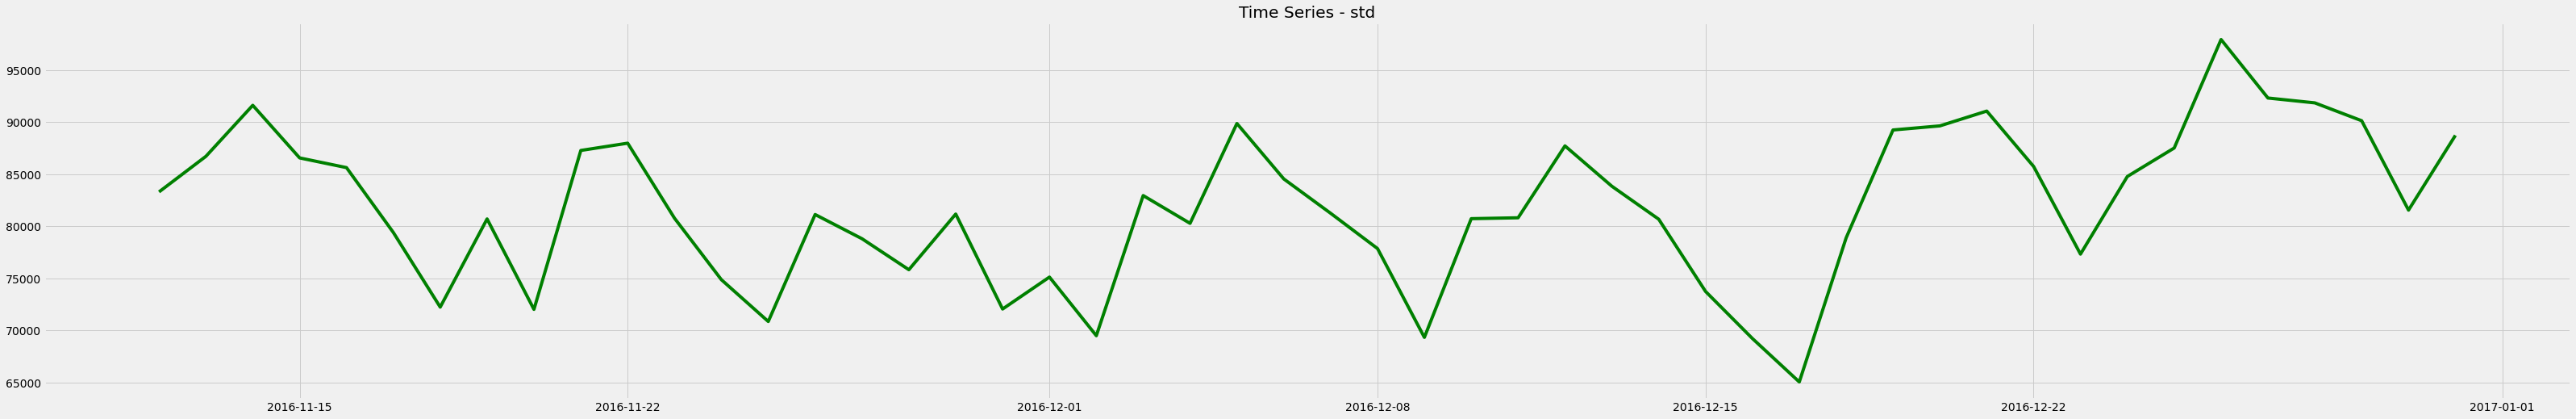

In [ ]:
plt.figure(figsize=(50, 8))
std_group = train_flattened[['Page','date','Visits']].groupby(['date'])['Visits'].std()
plt.plot(std_group, color = 'g')
plt.title('Time Series - std')
plt.show()

In [ ]:
# For the next graphics
train_flattened['month_num'] = train_flattened['month']
train_flattened['month'].replace('11','11 - November',inplace=True)
train_flattened['month'].replace('12','12 - December',inplace=True)

train_flattened['weekday_num'] = train_flattened['weekday']
train_flattened['weekday'].replace(0,'01 - Monday',inplace=True)
train_flattened['weekday'].replace(1,'02 - Tuesday',inplace=True)
train_flattened['weekday'].replace(2,'03 - Wednesday',inplace=True)
train_flattened['weekday'].replace(3,'04 - Thursday',inplace=True)
train_flattened['weekday'].replace(4,'05 - Friday',inplace=True)
train_flattened['weekday'].replace(5,'06 - Saturday',inplace=True)
train_flattened['weekday'].replace(6,'07 - Sunday',inplace=True)

In [ ]:
train_group = train_flattened.groupby(["month", "weekday"])['Visits'].mean().reset_index()
train_group = train_group.pivot('weekday','month','Visits')
train_group.sort_index(inplace=True)

In [ ]:
train_group

month,11,12
weekday,,
01 - Monday,1564.058295,1553.219910
02 - Tuesday,1541.318249,1517.166439
03 - Wednesday,1454.986458,1488.305696
04 - Thursday,1418.773382,1444.474767
05 - Friday,1361.625633,1365.955630
06 - Saturday,1469.242102,1390.486246
07 - Sunday,1581.814364,1490.858833


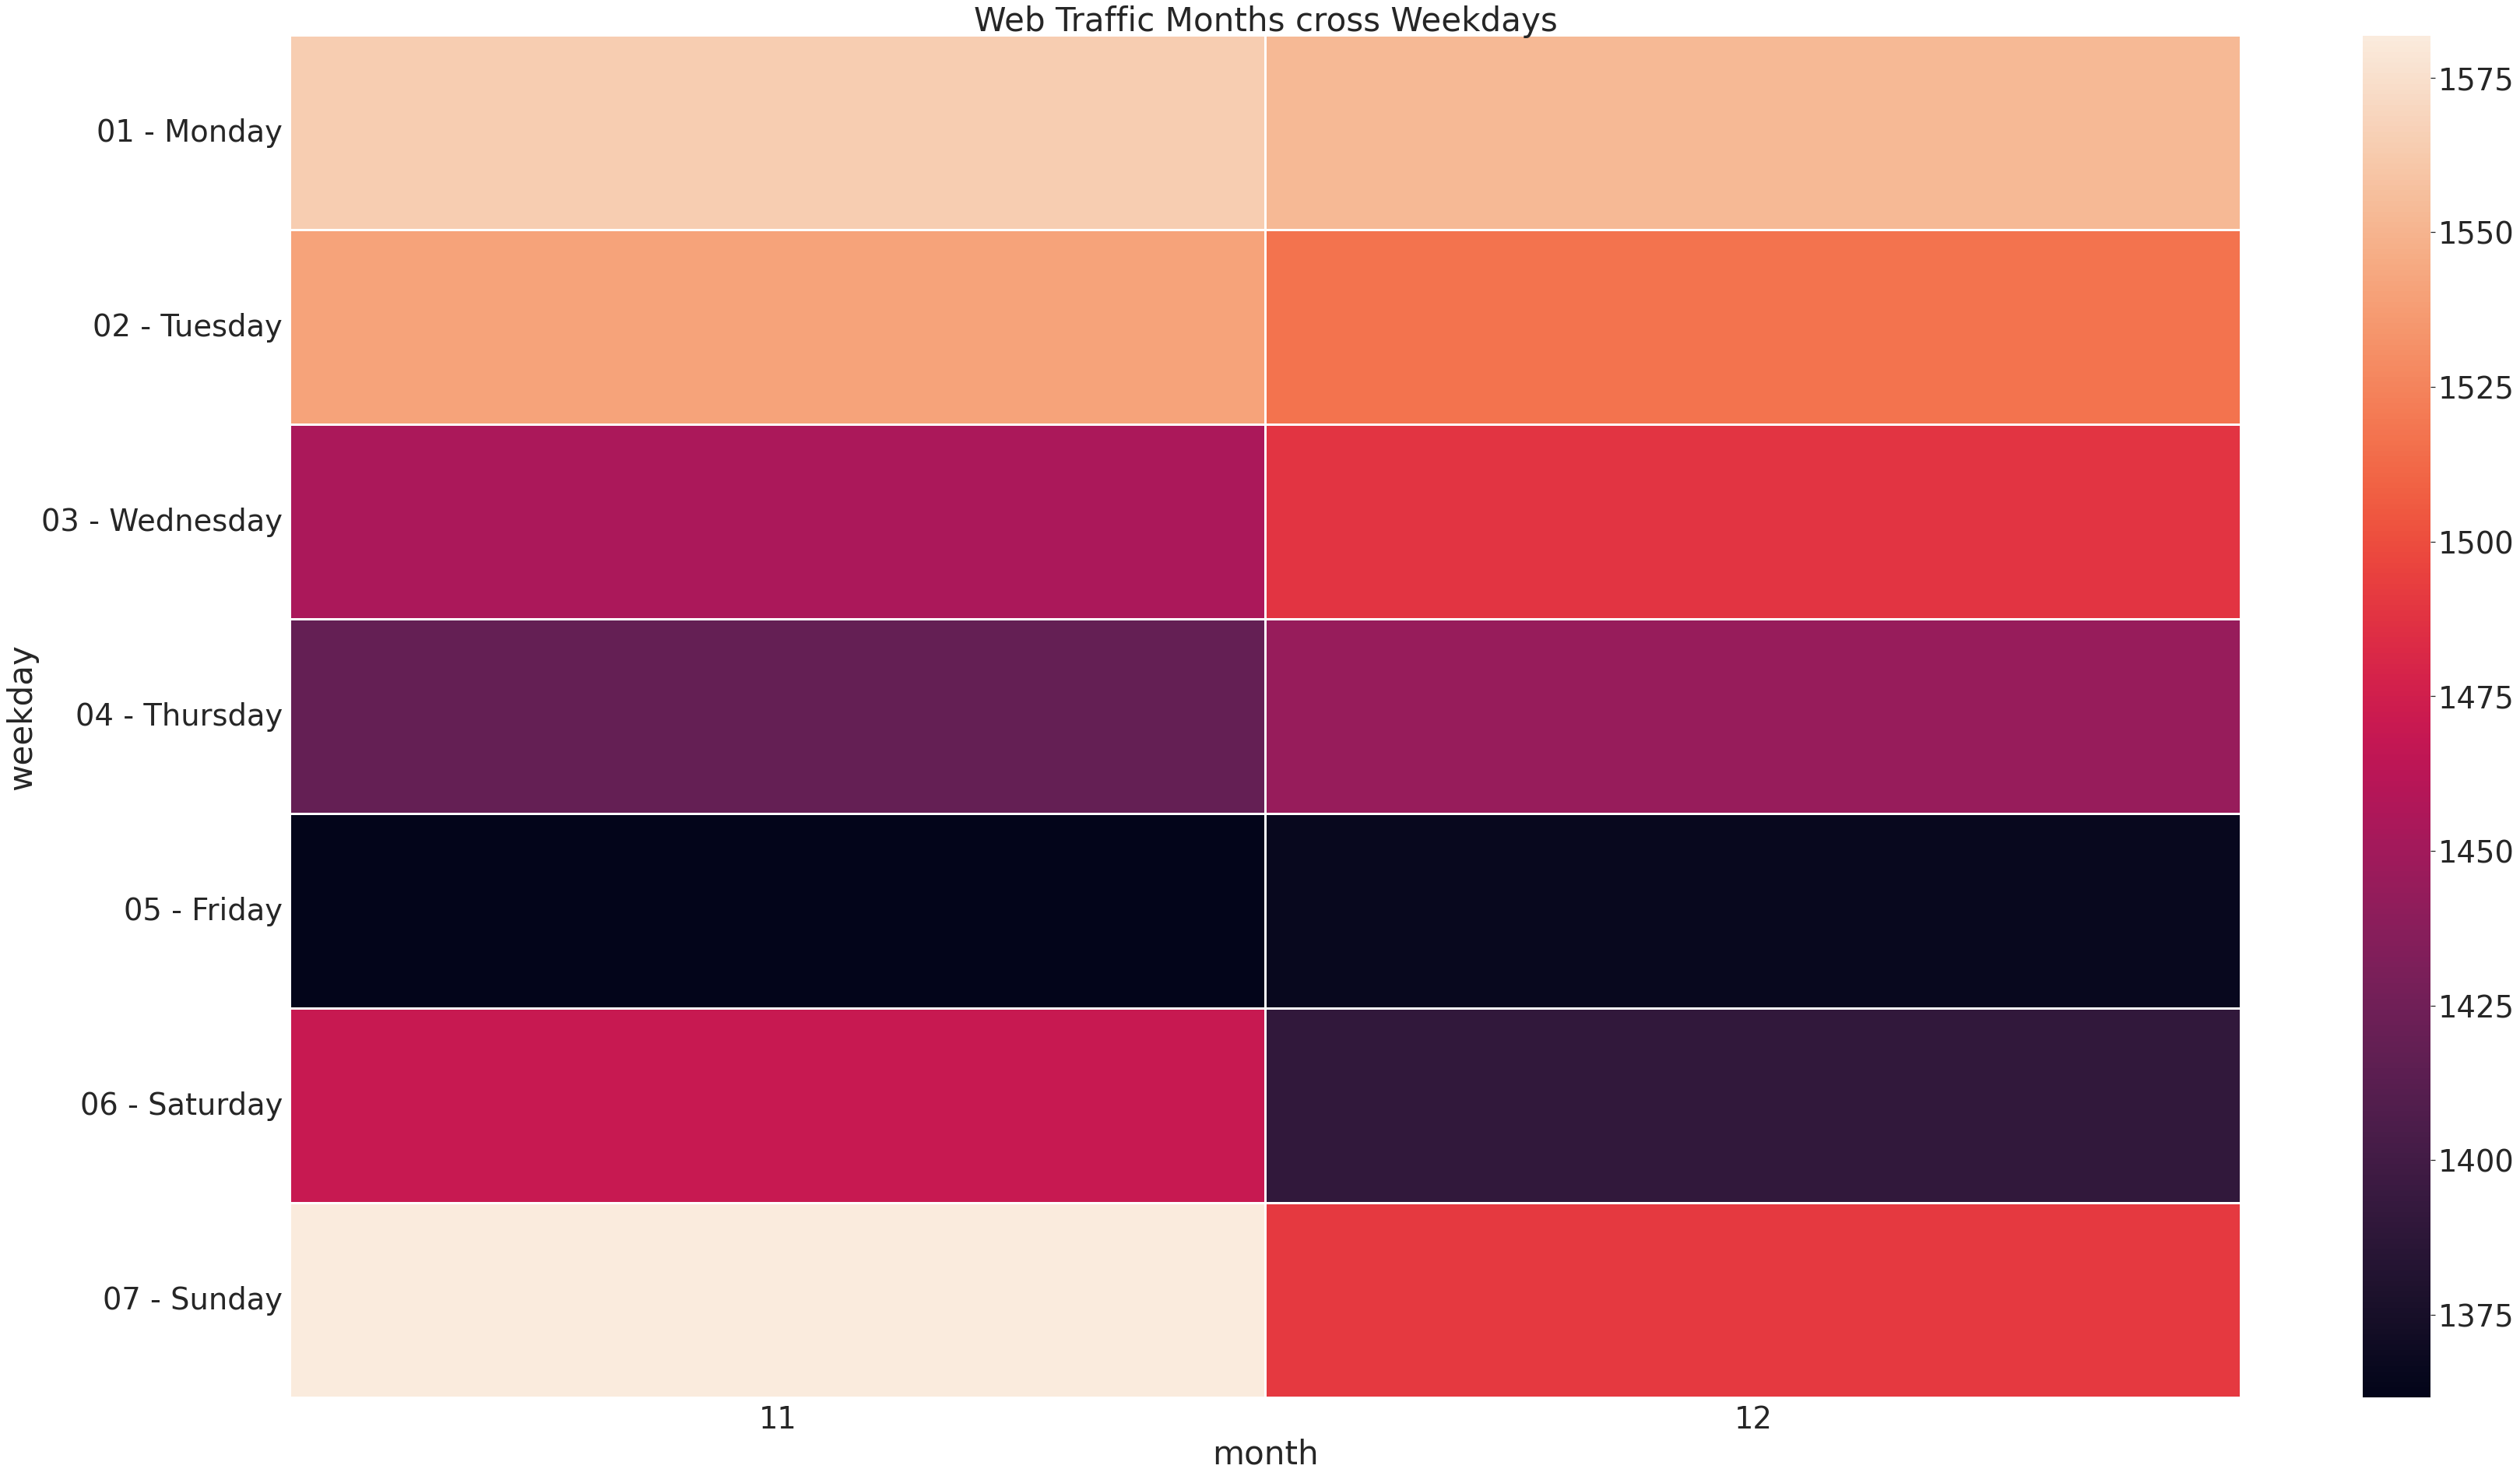

In [ ]:
sns.set(font_scale=3.5)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross Weekdays')
plt.show()

This heatmap show us in average the web traffic by weekdays cross the months. In our data we can see there are less activity in Friday and Saturday for December and November. And the biggest traffic is on the period Monday - Wednesday. It is possible to do Statistics Test to check if our intuition is ok. But You have a lot of works !

In [ ]:
train_day = train_flattened.groupby(["month", "day"])['Visits'].mean().reset_index()
train_day = train_day.pivot('day','month','Visits')
train_day.sort_index(inplace=True)
train_day.dropna(inplace=True)

In [ ]:
train_day

month,11,12
day,,
12,1536.471757,1457.877654
13,1679.630589,1393.217357
14,1701.941831,1456.495662
15,1564.172228,1338.356251
16,1520.673959,1265.571850
17,1463.751937,1280.523597
18,1396.544145,1474.682207
19,1399.170412,1561.789931
20,1482.018739,1501.701358


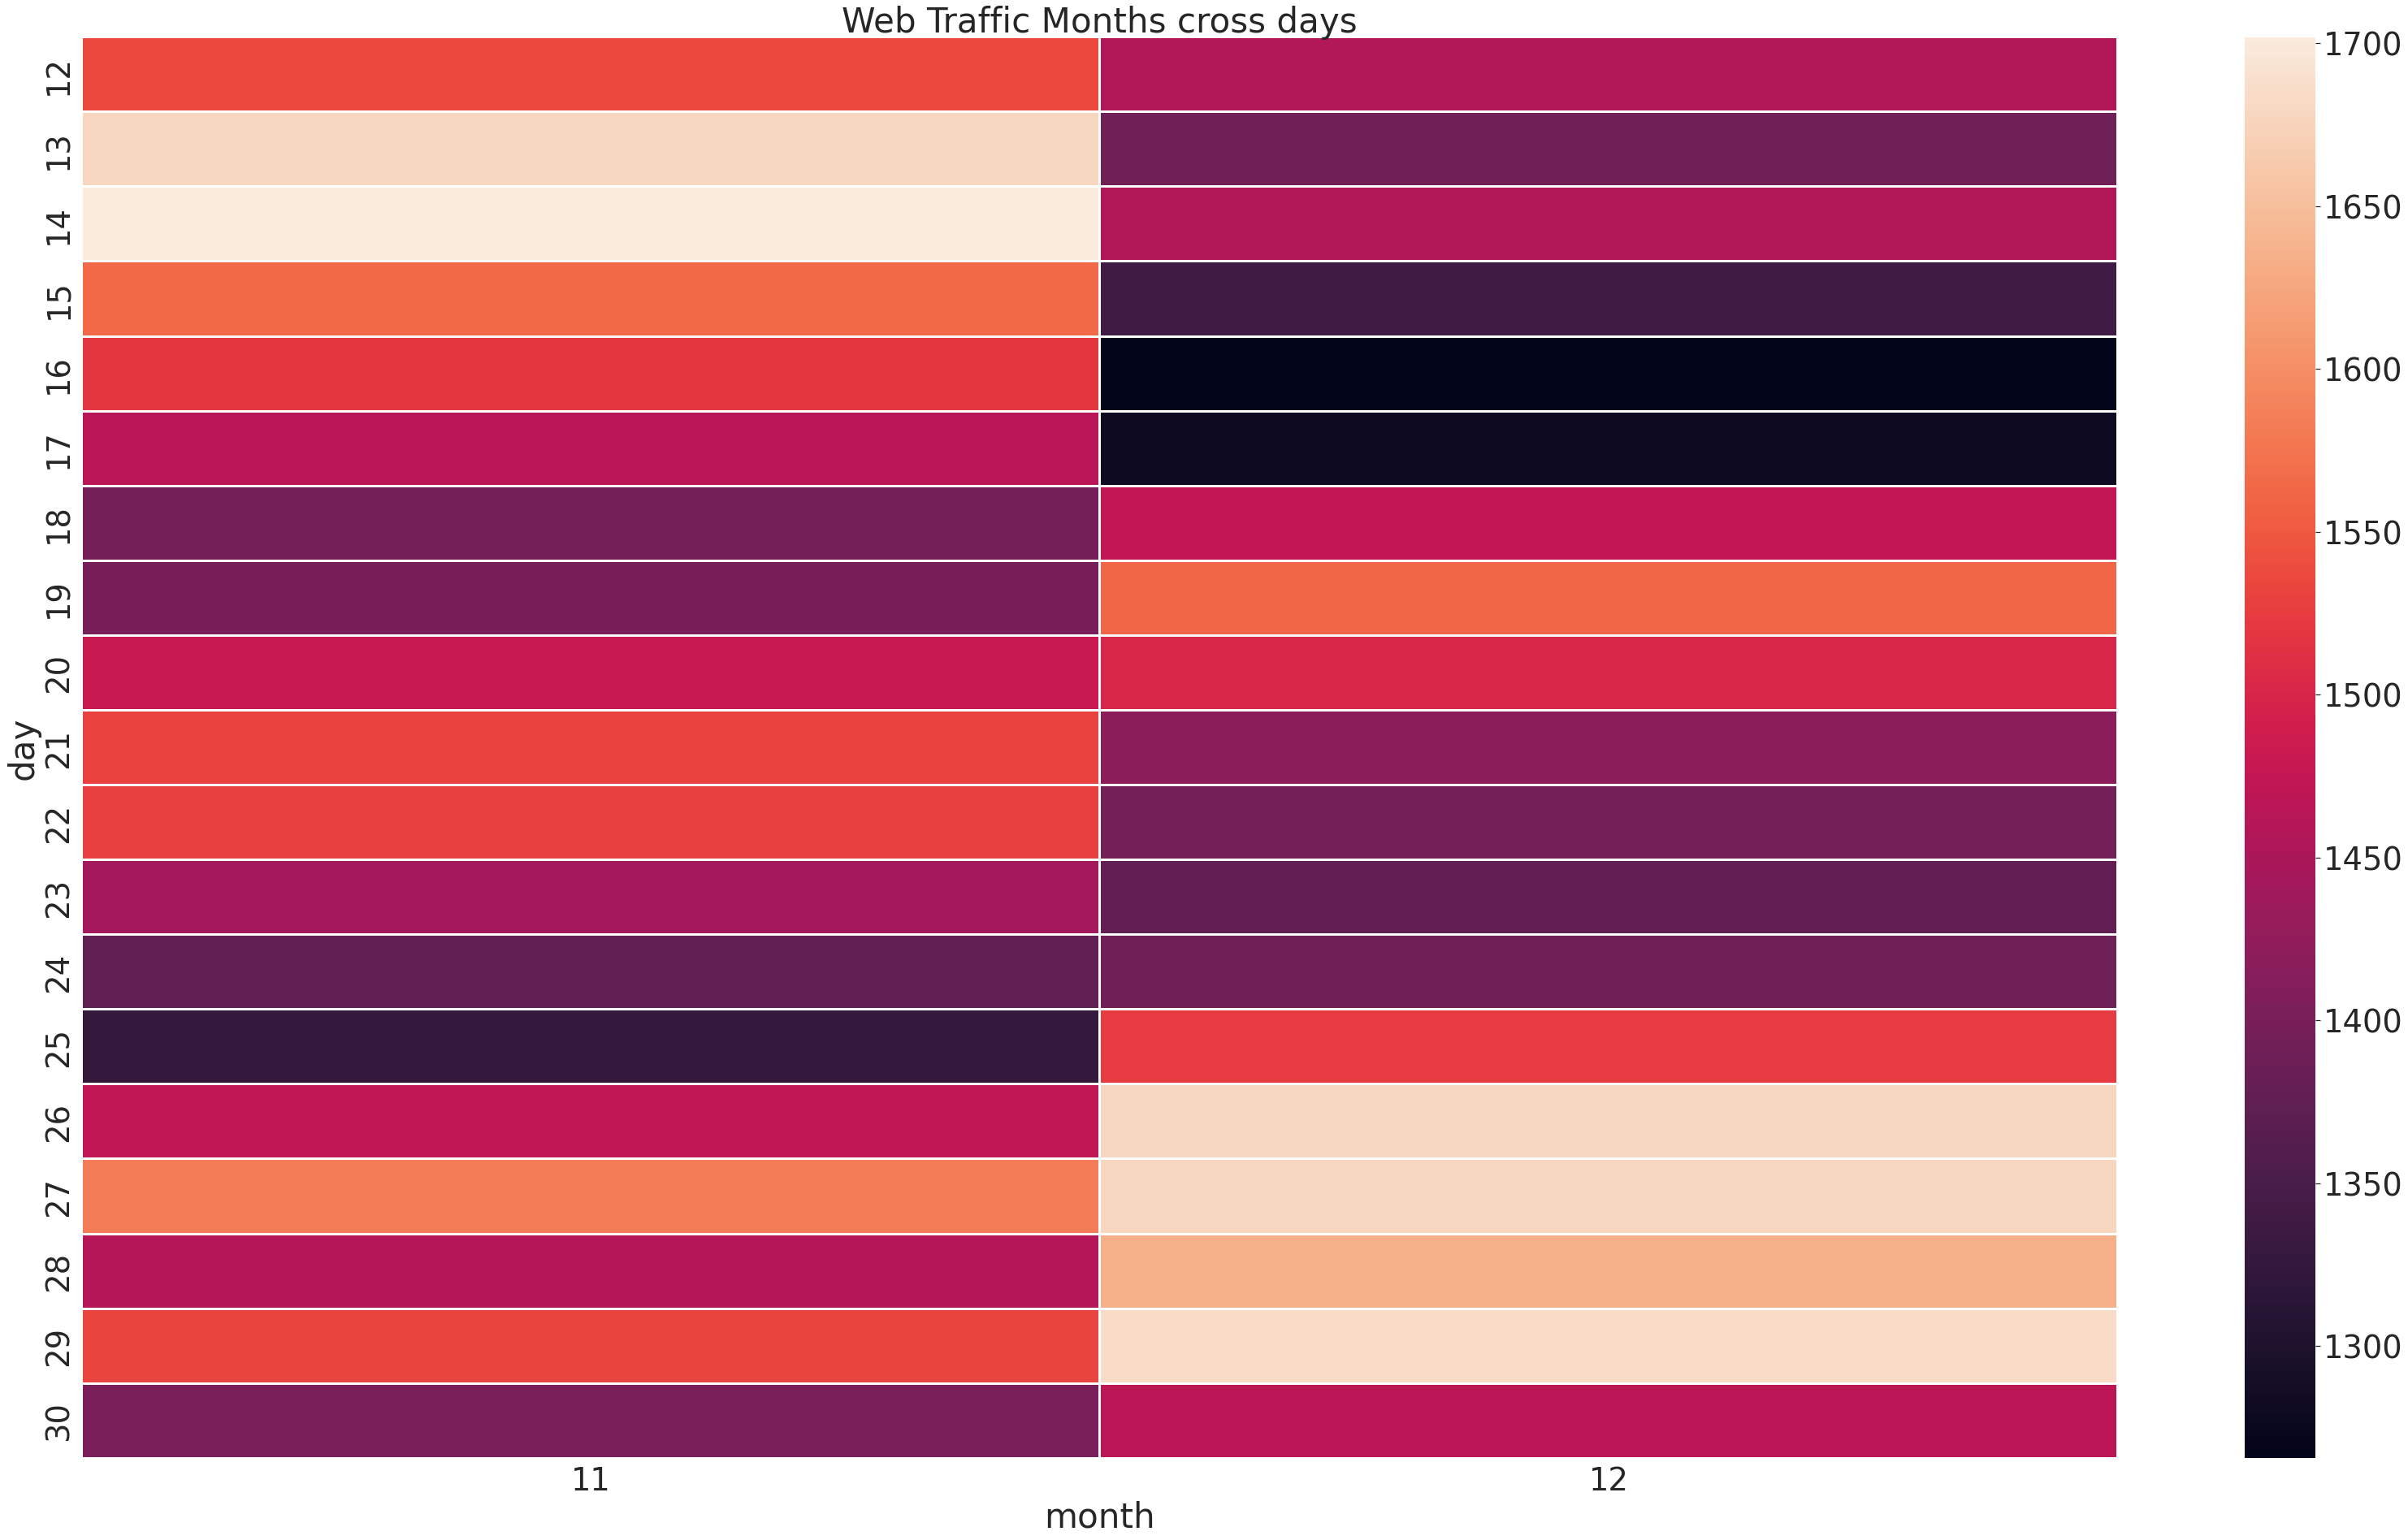

In [ ]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(train_day, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross days')
plt.show()

# Evaluation Metric: SMAPE


In [ ]:
def smape(actual, forecast):
    result = 1/len(actual) * np.sum(2*np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast))*100)
    return result

# ML Approach


In [ ]:
times_series_means =  pd.DataFrame(mean_group).reset_index(drop=False)
times_series_means['weekday'] = times_series_means['date'].apply(lambda x: x.weekday())
times_series_means['Date_str'] = times_series_means['date'].apply(lambda x: str(x))
times_series_means[['year','month','day']] = pd.DataFrame(times_series_means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])
date_staging = pd.DataFrame(times_series_means['day'].str.split(' ',2).tolist(), columns = ['day','other'])
times_series_means['day'] = date_staging['day']*1
times_series_means.drop('Date_str',axis = 1, inplace =True)
times_series_means.head()


,date,Visits,weekday,year,month,day
0,2016-11-12,1536.471757,5,2016,11,12
1,2016-11-13,1679.630589,6,2016,11,13
2,2016-11-14,1701.941831,0,2016,11,14
3,2016-11-15,1564.172228,1,2016,11,15
4,2016-11-16,1520.673959,2,2016,11,16


In [ ]:
times_series_means

,date,Visits,weekday,year,month,day
0,2016-11-12,1536.471757,5,2016,11,12
1,2016-11-13,1679.630589,6,2016,11,13
2,2016-11-14,1701.941831,0,2016,11,14
3,2016-11-15,1564.172228,1,2016,11,15
4,2016-11-16,1520.673959,2,2016,11,16
5,2016-11-17,1463.751937,3,2016,11,17
6,2016-11-18,1396.544145,4,2016,11,18
7,2016-11-19,1399.170412,5,2016,11,19
8,2016-11-20,1482.018739,6,2016,11,20
9,2016-11-21,1529.844585,0,2016,11,21


The first step for the ML approach is to create the feature that we will predict. In our example we don't predict the number of visits but the difference between two days. The tips to create few features is to take the difference between two days and to do a lag. Here we will take a lag of "diff" seven times. If you have a weekly pattern it is an interesting choice. Here we have few data (2 months so 30 values) and it is a contraint. I done some test and the number 7 is a good choice (weekly pattern?).  

## Feature Engineering

In [ ]:
times_series_means.reset_index(drop=True,inplace=True)

def lag_func(data,lag):
    lag = lag
    X = lagmat(data["diff"], lag)
    lagged = data.copy()
    for c in range(1,lag+1):
        lagged["lag%d" % c] = X[:, c-1]
    return lagged

def diff_creation(data):
    data["diff"] = np.nan
    data.loc[1:, "diff"] = (data.iloc[1:, 1].to_numpy() - data.iloc[:len(data)-1, 1].to_numpy())
    return data

df_count = diff_creation(times_series_means)

# Creation of 7 features with "diff"
lag = 7
lagged = lag_func(df_count,lag)
last_date = lagged['date'].max()

In [ ]:
df_count

,date,Visits,weekday,year,month,day,diff
0,2016-11-12,1536.471757,5,2016,11,12,NaN
1,2016-11-13,1679.630589,6,2016,11,13,143.158833
2,2016-11-14,1701.941831,0,2016,11,14,22.311241
3,2016-11-15,1564.172228,1,2016,11,15,-137.769602
4,2016-11-16,1520.673959,2,2016,11,16,-43.498270
5,2016-11-17,1463.751937,3,2016,11,17,-56.922022
6,2016-11-18,1396.544145,4,2016,11,18,-67.207791
7,2016-11-19,1399.170412,5,2016,11,19,2.626266
8,2016-11-20,1482.018739,6,2016,11,20,82.848327
9,2016-11-21,1529.844585,0,2016,11,21,47.825846


In [ ]:
last_date

Timestamp('2016-12-31 00:00:00')

In [ ]:
lagged

,date,Visits,weekday,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,2016-11-12,1536.471757,5,2016,11,12,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2016-11-13,1679.630589,6,2016,11,13,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2016-11-14,1701.941831,0,2016,11,14,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
3,2016-11-15,1564.172228,1,2016,11,15,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,0.000000
4,2016-11-16,1520.673959,2,2016,11,16,-43.498270,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000,0.000000
5,2016-11-17,1463.751937,3,2016,11,17,-56.922022,-43.498270,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000
6,2016-11-18,1396.544145,4,2016,11,18,-67.207791,-56.922022,-43.498270,-137.769602,22.311241,143.158833,NaN,0.000000
7,2016-11-19,1399.170412,5,2016,11,19,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241,143.158833,NaN
8,2016-11-20,1482.018739,6,2016,11,20,82.848327,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241,143.158833
9,2016-11-21,1529.844585,0,2016,11,21,47.825846,82.848327,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241


## Train Test split


In [ ]:
def train_test(data_lag):
    xc = ["lag%d" % i for i in range(1,lag+1)] + ['weekday'] + ['day']
    split = 0.70
    xt = data_lag[(lag+1):][xc]
    yt = data_lag[(lag+1):]["diff"]
    isplit = int(len(xt) * split)
    x_train, y_train, x_test, y_test = xt[:isplit], yt[:isplit], xt[isplit:], yt[isplit:]
    return x_train, y_train, x_test, y_test, xt, yt

x_train, y_train, x_test, y_test, xt, yt = train_test(lagged)

In [ ]:
lagged[8:]

,date,Visits,weekday,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7
8,2016-11-20,1482.018739,6,2016,11,20,82.848327,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241,143.158833
9,2016-11-21,1529.844585,0,2016,11,21,47.825846,82.848327,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241
10,2016-11-22,1526.723944,1,2016,11,22,-3.120641,47.825846,82.848327,2.626266,-67.207791,-56.922022,-43.498270,-137.769602
11,2016-11-23,1444.043898,2,2016,11,23,-82.680046,-3.120641,47.825846,82.848327,2.626266,-67.207791,-56.922022,-43.498270
12,2016-11-24,1373.814638,3,2016,11,24,-70.229260,-82.680046,-3.120641,47.825846,82.848327,2.626266,-67.207791,-56.922022
13,2016-11-25,1326.709107,4,2016,11,25,-47.105531,-70.229260,-82.680046,-3.120641,47.825846,82.848327,2.626266,-67.207791
14,2016-11-26,1472.107224,5,2016,11,26,145.398117,-47.105531,-70.229260,-82.680046,-3.120641,47.825846,82.848327,2.626266
15,2016-11-27,1583.903133,6,2016,11,27,111.795910,145.398117,-47.105531,-70.229260,-82.680046,-3.120641,47.825846,82.848327
16,2016-11-28,1460.719082,0,2016,11,28,-123.184051,111.795910,145.398117,-47.105531,-70.229260,-82.680046,-3.120641,47.825846
17,2016-11-29,1533.142157,1,2016,11,29,72.423075,-123.184051,111.795910,145.398117,-47.105531,-70.229260,-82.680046,-3.120641


In [ ]:
x_train

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,weekday,day
8,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241,143.158833,6,20
9,82.848327,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241,0,21
10,47.825846,82.848327,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,1,22
11,-3.120641,47.825846,82.848327,2.626266,-67.207791,-56.922022,-43.498270,2,23
12,-82.680046,-3.120641,47.825846,82.848327,2.626266,-67.207791,-56.922022,3,24
13,-70.229260,-82.680046,-3.120641,47.825846,82.848327,2.626266,-67.207791,4,25
14,-47.105531,-70.229260,-82.680046,-3.120641,47.825846,82.848327,2.626266,5,26
15,145.398117,-47.105531,-70.229260,-82.680046,-3.120641,47.825846,82.848327,6,27
16,111.795910,145.398117,-47.105531,-70.229260,-82.680046,-3.120641,47.825846,0,28
17,-123.184051,111.795910,145.398117,-47.105531,-70.229260,-82.680046,-3.120641,1,29


In [ ]:
y_train

8      82.848327
9      47.825846
10     -3.120641
11    -82.680046
12    -70.229260
13    -47.105531
14    145.398117
15    111.795910
16   -123.184051
17     72.423075
18   -132.786440
19    -11.348525
20    -39.740418
21     90.769757
22     85.475066
23    -11.753069
24    -18.416608
25    -50.511255
26    -28.541503
27    -46.788019
28     -9.049927
29     79.252210
30     18.174229
31    -64.660298
32     63.278305
33   -118.139411
34    -72.784401
35     14.951747
36    194.158610
Name: diff, dtype: float64

In [ ]:
x_test

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,weekday,day
37,194.158610,14.951747,-72.784401,-118.139411,63.278305,-64.660298,18.174229,0,19
38,87.107725,194.158610,14.951747,-72.784401,-118.139411,63.278305,-64.660298,1,20
39,-60.088574,87.107725,194.158610,14.951747,-72.784401,-118.139411,63.278305,2,21
40,-83.638288,-60.088574,87.107725,194.158610,14.951747,-72.784401,-118.139411,3,22
41,-23.967567,-83.638288,-60.088574,87.107725,194.158610,14.951747,-72.784401,4,23
42,-16.613785,-23.967567,-83.638288,-60.088574,87.107725,194.158610,14.951747,5,24
43,15.617490,-16.613785,-23.967567,-83.638288,-60.088574,87.107725,194.158610,6,25
44,130.640714,15.617490,-16.613785,-23.967567,-83.638288,-60.088574,87.107725,0,26
45,155.866632,130.640714,15.617490,-16.613785,-23.967567,-83.638288,-60.088574,1,27
46,-1.304683,155.866632,130.640714,15.617490,-16.613785,-23.967567,-83.638288,2,28


In [ ]:
y_test

37     87.107725
38    -60.088574
39    -83.638288
40    -23.967567
41    -16.613785
42     15.617490
43    130.640714
44    155.866632
45     -1.304683
46    -44.336265
47     50.342112
48   -216.364339
49     10.338759
Name: diff, dtype: float64

In [ ]:
xt

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,weekday,day
8,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241,143.158833,6,20
9,82.848327,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241,0,21
10,47.825846,82.848327,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,1,22
11,-3.120641,47.825846,82.848327,2.626266,-67.207791,-56.922022,-43.498270,2,23
12,-82.680046,-3.120641,47.825846,82.848327,2.626266,-67.207791,-56.922022,3,24
13,-70.229260,-82.680046,-3.120641,47.825846,82.848327,2.626266,-67.207791,4,25
14,-47.105531,-70.229260,-82.680046,-3.120641,47.825846,82.848327,2.626266,5,26
15,145.398117,-47.105531,-70.229260,-82.680046,-3.120641,47.825846,82.848327,6,27
16,111.795910,145.398117,-47.105531,-70.229260,-82.680046,-3.120641,47.825846,0,28
17,-123.184051,111.795910,145.398117,-47.105531,-70.229260,-82.680046,-3.120641,1,29


In [ ]:
yt

8      82.848327
9      47.825846
10     -3.120641
11    -82.680046
12    -70.229260
13    -47.105531
14    145.398117
15    111.795910
16   -123.184051
17     72.423075
18   -132.786440
19    -11.348525
20    -39.740418
21     90.769757
22     85.475066
23    -11.753069
24    -18.416608
25    -50.511255
26    -28.541503
27    -46.788019
28     -9.049927
29     79.252210
30     18.174229
31    -64.660298
32     63.278305
33   -118.139411
34    -72.784401
35     14.951747
36    194.158610
37     87.107725
38    -60.088574
39    -83.638288
40    -23.967567
41    -16.613785
42     15.617490
43    130.640714
44    155.866632
45     -1.304683
46    -44.336265
47     50.342112
48   -216.364339
49     10.338759
Name: diff, dtype: float64

## Necessary Functions

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

def modelisation(x_tr, y_tr, x_ts, y_ts, xt, yt, model0, model1):
    # Modelisation with all product
    model0.fit(x_tr, y_tr)

    prediction = model0.predict(x_ts)
    r2 = r2_score(y_ts.to_numpy(), prediction)
    mae = mean_absolute_error(y_ts.to_numpy(), prediction)
    smape_value = smape(y_ts.to_numpy(), prediction)
    print ("-----------------------------------------------")
    print ("mae with 70% of the data to train:", mae)
    print ("-----------------------------------------------")
    print ("r2 with 70% of the data to train:", r2)
    print ("-----------------------------------------------")
    print ("smape with 70% of the data to train:", smape_value)
    print ("-----------------------------------------------")

    # Model with all data
    model1.fit(xt, yt)

    return model1, prediction, model0


In [ ]:
# Prediction
def pred_df(data,number_of_days):
    data_pred = pd.DataFrame(pd.Series(data["date"][data.shape[0]-1] + timedelta(days=1)),columns = ["date"])
    for i in range(number_of_days):
        inter = pd.DataFrame(pd.Series(data["date"][data.shape[0]-1] + timedelta(days=i+2)),columns = ["date"])
        data_pred = pd.concat([data_pred,inter]).reset_index(drop=True)
    return data_pred

In [ ]:
def initialisation(data_lag, data_pred, model, xtrain, ytrain, number_of_days):
    # Initialisation
    model.fit(xtrain, ytrain)

    for i in range(number_of_days-1):
        lag1 = data_lag.tail(1)["diff"].values[0]
        lag2 = data_lag.tail(1)["lag1"].values[0]
        lag3 = data_lag.tail(1)["lag2"].values[0]
        lag4 = data_lag.tail(1)["lag3"].values[0]
        lag5 = data_lag.tail(1)["lag4"].values[0]
        lag6 = data_lag.tail(1)["lag5"].values[0]
        lag7 = data_lag.tail(1)["lag6"].values[0]
        lag8 = data_lag.tail(1)["lag7"].values[0]

        data_pred['weekday'] = data_pred['date'].apply(lambda x:x.weekday())
        weekday = data_pred['weekday'][0]

        row = pd.Series([lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,weekday]
                        ,['lag1', 'lag2', 'lag3','lag4','lag5','lag6','lag7','lag8','weekday'])
        to_predict = pd.DataFrame(columns = ['lag1', 'lag2', 'lag3','lag4','lag5','lag6','lag7','lag8','weekday'])
        prediction = pd.DataFrame(columns = ['diff'])
        to_predict = to_predict.append([row])
        prediction = pd.DataFrame(model.predict(to_predict),columns = ['diff'])

        # Loop
        if i == 0:
            last_predict = data_lag["Visits"][data_lag.shape[0]-1] + prediction.values[0][0]

        if i > 0 :
            last_predict = data_lag["Visits"][data_lag.shape[0]-1] + prediction.values[0][0]

        data_lag = pd.concat([data_lag,prediction.join(data_pred["date"]).join(to_predict)]).reset_index(drop=True)
        data_lag["Visits"][data_lag.shape[0]-1] = last_predict

        # test
        data_pred = data_pred[data_pred["date"]>data_pred["date"][0]].reset_index(drop=True)

    return data_lag


## ADA Boost


### Finding Error Rate

In [ ]:

model0 =  AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)
model1 =  AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)

clr, prediction, clr0  = modelisation(x_train, y_train, x_test, y_test, xt, yt, model0, model1)

-----------------------------------------------
mae with 70% of the data to train: 77.35881695062493
-----------------------------------------------
r2 with 70% of the data to train: -0.07884186348326505
-----------------------------------------------
smape with 70% of the data to train: 121.00971082186922
-----------------------------------------------


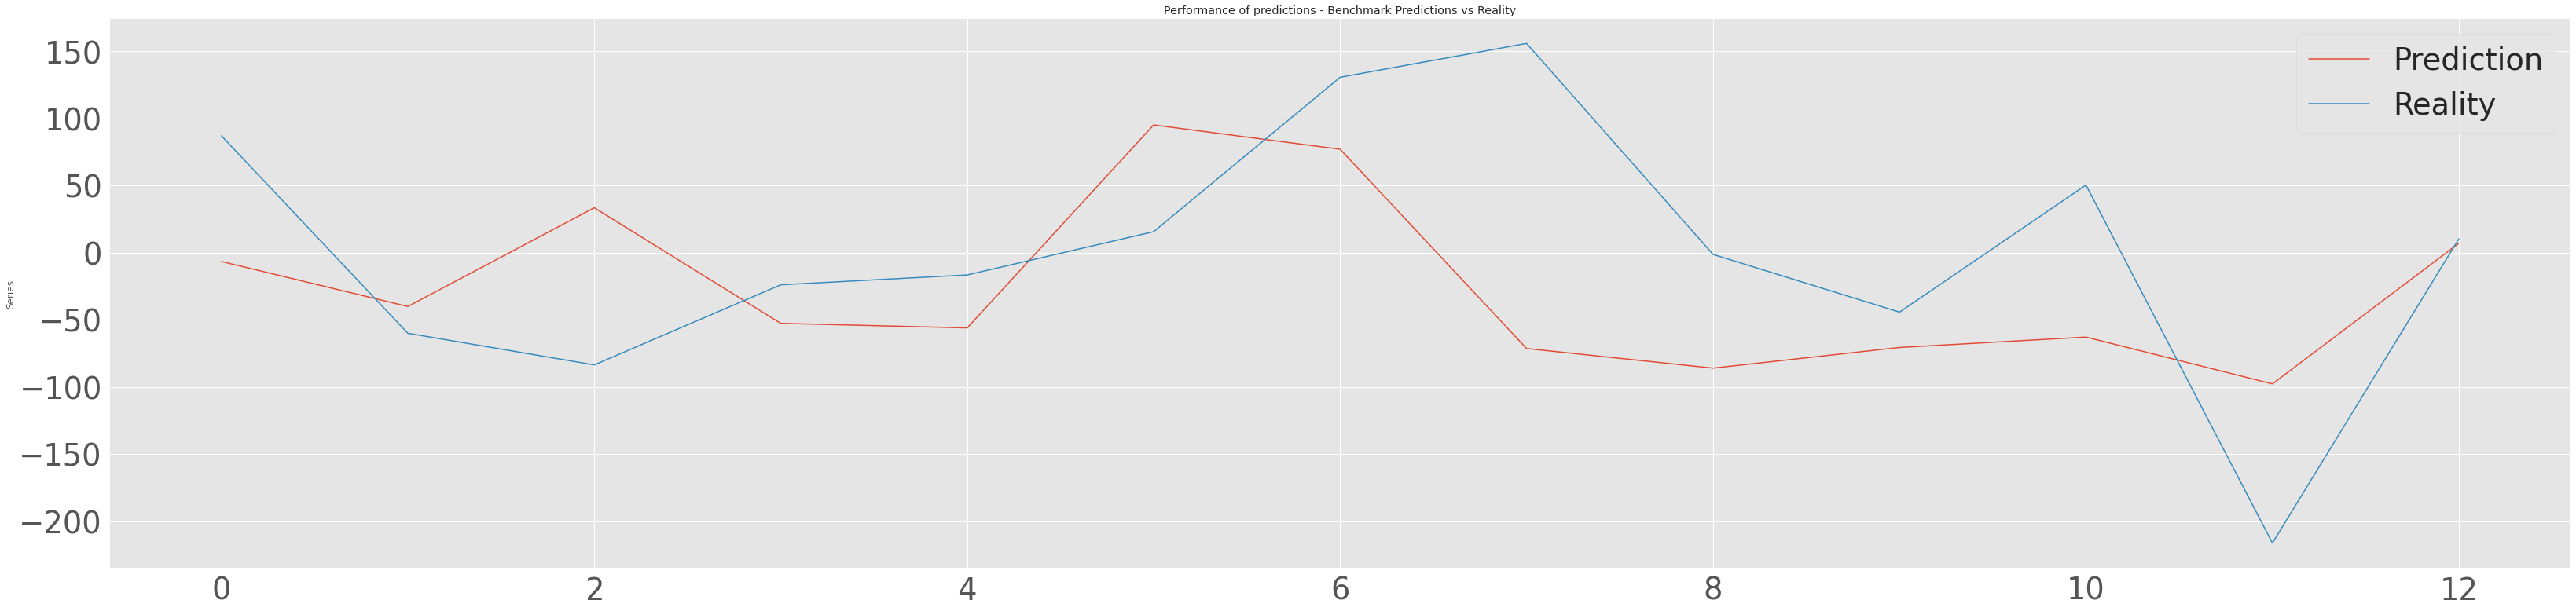

In [ ]:
# Performance 1
plt.style.use('ggplot')
plt.figure(figsize=(50, 12))
line_up, = plt.plot(prediction,label='Prediction')
line_down, = plt.plot(np.array(y_test),label='Reality')
plt.ylabel('Series')
plt.legend(handles=[line_up, line_down])
plt.title('Performance of predictions - Benchmark Predictions vs Reality')
plt.show()

In [ ]:
#prediction

data_to_pred = pred_df(df_count,30)

In [ ]:
data_to_pred

,date
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
5,2017-01-06
6,2017-01-07
7,2017-01-08
8,2017-01-09
9,2017-01-10


In [ ]:

model_fin = AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)

In [ ]:
lagged

,date,Visits,weekday,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,2016-11-12,1536.471757,5,2016,11,12,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2016-11-13,1679.630589,6,2016,11,13,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2016-11-14,1701.941831,0,2016,11,14,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
3,2016-11-15,1564.172228,1,2016,11,15,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,0.000000
4,2016-11-16,1520.673959,2,2016,11,16,-43.498270,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000,0.000000
5,2016-11-17,1463.751937,3,2016,11,17,-56.922022,-43.498270,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000
6,2016-11-18,1396.544145,4,2016,11,18,-67.207791,-56.922022,-43.498270,-137.769602,22.311241,143.158833,NaN,0.000000
7,2016-11-19,1399.170412,5,2016,11,19,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241,143.158833,NaN
8,2016-11-20,1482.018739,6,2016,11,20,82.848327,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241,143.158833
9,2016-11-21,1529.844585,0,2016,11,21,47.825846,82.848327,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241


In [ ]:
lagged.shape

(50, 14)

### Predicting New Values for Next 30 days

In [ ]:
lagged_adaboost = initialisation(lagged, data_to_pred, model_fin, xt, yt, 30)

In [ ]:
lagged_adaboost.shape

(79, 15)

In [ ]:
lagged_adaboost

,date,Visits,weekday,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
0,2016-11-12,1536.471757,5.0,2016,11,12,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,2016-11-13,1679.630589,6.0,2016,11,13,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,2016-11-14,1701.941831,0.0,2016,11,14,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,2016-11-15,1564.172228,1.0,2016,11,15,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,NaN
4,2016-11-16,1520.673959,2.0,2016,11,16,-43.498270,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2017-01-25,1756.039605,2.0,NaN,NaN,NaN,-17.597576,20.809406,82.363638,24.353673,-8.110767,-36.734299,-15.567453,-47.841388,19.692312
75,2017-01-26,1732.854219,3.0,NaN,NaN,NaN,-23.185386,-17.597576,20.809406,82.363638,24.353673,-8.110767,-36.734299,-15.567453,-47.841388
76,2017-01-27,1702.041521,4.0,NaN,NaN,NaN,-30.812698,-23.185386,-17.597576,20.809406,82.363638,24.353673,-8.110767,-36.734299,-15.567453
77,2017-01-28,1685.745348,5.0,NaN,NaN,NaN,-16.296173,-30.812698,-23.185386,-17.597576,20.809406,82.363638,24.353673,-8.110767,-36.734299


In [ ]:
lagged_adaboost.shape

(79, 15)

In [ ]:
lagged_adaboost[lagged_adaboost['diff']<0]
lagged_adaboost.loc[(lagged_adaboost.Visits < 0), 'Visits'] = 0

In [ ]:
lagged_adaboost.shape

(79, 15)

In [ ]:
lagged_adaboost

,date,Visits,weekday,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
0,2016-11-12,1536.471757,5.0,2016,11,12,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,2016-11-13,1679.630589,6.0,2016,11,13,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,2016-11-14,1701.941831,0.0,2016,11,14,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,2016-11-15,1564.172228,1.0,2016,11,15,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,NaN
4,2016-11-16,1520.673959,2.0,2016,11,16,-43.498270,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2017-01-25,1756.039605,2.0,NaN,NaN,NaN,-17.597576,20.809406,82.363638,24.353673,-8.110767,-36.734299,-15.567453,-47.841388,19.692312
75,2017-01-26,1732.854219,3.0,NaN,NaN,NaN,-23.185386,-17.597576,20.809406,82.363638,24.353673,-8.110767,-36.734299,-15.567453,-47.841388
76,2017-01-27,1702.041521,4.0,NaN,NaN,NaN,-30.812698,-23.185386,-17.597576,20.809406,82.363638,24.353673,-8.110767,-36.734299,-15.567453
77,2017-01-28,1685.745348,5.0,NaN,NaN,NaN,-16.296173,-30.812698,-23.185386,-17.597576,20.809406,82.363638,24.353673,-8.110767,-36.734299


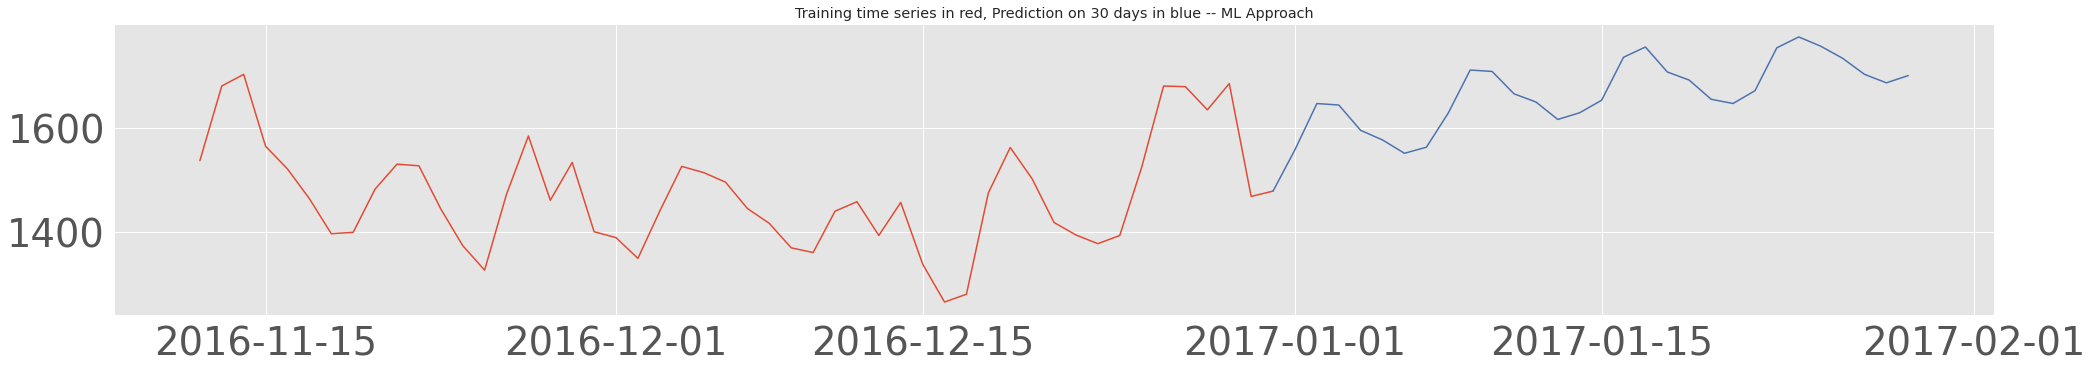

In [ ]:
df_lagged = lagged_adaboost[['Visits','date']]
df_train = df_lagged[df_lagged['date'] <= last_date]
df_pred = df_lagged[df_lagged['date'] >= last_date]
plt.style.use('ggplot')
plt.figure(figsize=(30, 5))
plt.plot(df_train.date,df_train.Visits)
plt.plot(df_pred.date,df_pred.Visits,color='b')
plt.title('Training time series in red, Prediction on 30 days in blue -- ML Approach')
plt.savefig('testplot.png')
plt.show()


## Linear Regression

### Finding Error Rate

In [ ]:
model0 =  LinearRegression(fit_intercept=True)
model1 =  LinearRegression(fit_intercept=True)

clr, prediction, clr0  = modelisation(x_train, y_train, x_test, y_test, xt, yt, model0, model1)

-----------------------------------------------
mae with 70% of the data to train: 88.0244034452011
-----------------------------------------------
r2 with 70% of the data to train: -0.4156136629066527
-----------------------------------------------
smape with 70% of the data to train: 129.03336337546256
-----------------------------------------------


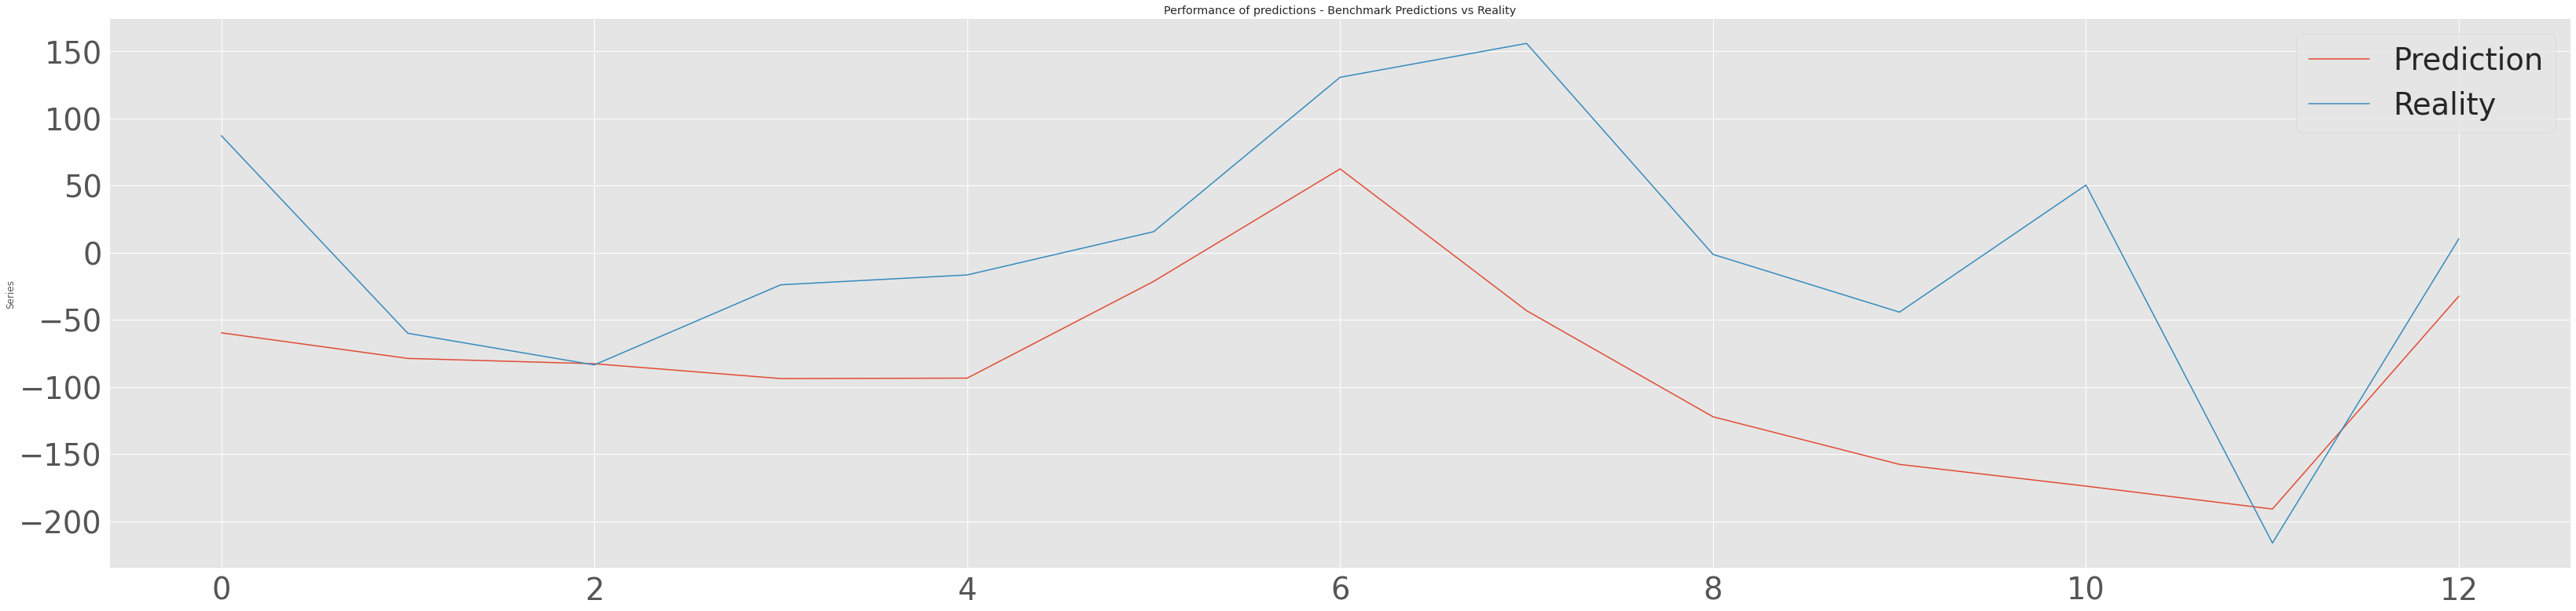

In [ ]:
# Performance 1
plt.style.use('ggplot')
plt.figure(figsize=(50, 12))
line_up, = plt.plot(prediction,label='Prediction')
line_down, = plt.plot(np.array(y_test),label='Reality')
plt.ylabel('Series')
plt.legend(handles=[line_up, line_down])
plt.title('Performance of predictions - Benchmark Predictions vs Reality')
plt.show()

In [ ]:


data_to_pred = pred_df(df_count,30)

In [ ]:
data_to_pred

,date
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
5,2017-01-06
6,2017-01-07
7,2017-01-08
8,2017-01-09
9,2017-01-10


In [ ]:

model_fin = LinearRegression(fit_intercept=True)

In [ ]:
lagged

,date,Visits,weekday,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,2016-11-12,1536.471757,5,2016,11,12,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2016-11-13,1679.630589,6,2016,11,13,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2016-11-14,1701.941831,0,2016,11,14,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
3,2016-11-15,1564.172228,1,2016,11,15,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,0.000000
4,2016-11-16,1520.673959,2,2016,11,16,-43.498270,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000,0.000000
5,2016-11-17,1463.751937,3,2016,11,17,-56.922022,-43.498270,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000
6,2016-11-18,1396.544145,4,2016,11,18,-67.207791,-56.922022,-43.498270,-137.769602,22.311241,143.158833,NaN,0.000000
7,2016-11-19,1399.170412,5,2016,11,19,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241,143.158833,NaN
8,2016-11-20,1482.018739,6,2016,11,20,82.848327,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241,143.158833
9,2016-11-21,1529.844585,0,2016,11,21,47.825846,82.848327,2.626266,-67.207791,-56.922022,-43.498270,-137.769602,22.311241


In [ ]:
lagged.shape

(50, 14)

### Predicting New Values for Next 30 Days

In [ ]:
lagged_linear = initialisation(lagged, data_to_pred, model_fin, xt, yt, 30)

In [ ]:
lagged_linear.shape

(79, 15)

In [ ]:
lagged_linear

,date,Visits,weekday,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
0,2016-11-12,1536.471757,5.0,2016,11,12,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,2016-11-13,1679.630589,6.0,2016,11,13,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,2016-11-14,1701.941831,0.0,2016,11,14,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,2016-11-15,1564.172228,1.0,2016,11,15,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,NaN
4,2016-11-16,1520.673959,2.0,2016,11,16,-43.498270,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2017-01-25,47129.487667,2.0,NaN,NaN,NaN,43668.693713,35838.564617,-8555.213634,-6329.385994,-20277.262172,-20440.678398,2146.831592,14759.343348,7103.276625
75,2017-01-26,107538.547280,3.0,NaN,NaN,NaN,60409.059614,43668.693713,35838.564617,-8555.213634,-6329.385994,-20277.262172,-20440.678398,2146.831592,14759.343348
76,2017-01-27,81891.674530,4.0,NaN,NaN,NaN,-25646.872750,60409.059614,43668.693713,35838.564617,-8555.213634,-6329.385994,-20277.262172,-20440.678398,2146.831592
77,2017-01-28,-47255.702883,5.0,NaN,NaN,NaN,-129147.377414,-25646.872750,60409.059614,43668.693713,35838.564617,-8555.213634,-6329.385994,-20277.262172,-20440.678398


In [ ]:
lagged_linear.shape

(79, 15)

In [ ]:
lagged_linear[lagged_linear['diff']<0]
lagged_linear.loc[(lagged_linear.Visits < 0), 'Visits'] = 0

In [ ]:
lagged_linear.shape

(79, 15)

In [ ]:
lagged_linear

,date,Visits,weekday,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
0,2016-11-12,1536.471757,5.0,2016,11,12,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,2016-11-13,1679.630589,6.0,2016,11,13,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,2016-11-14,1701.941831,0.0,2016,11,14,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,2016-11-15,1564.172228,1.0,2016,11,15,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,0.000000,NaN
4,2016-11-16,1520.673959,2.0,2016,11,16,-43.498270,-137.769602,22.311241,143.158833,NaN,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2017-01-25,47129.487667,2.0,NaN,NaN,NaN,43668.693713,35838.564617,-8555.213634,-6329.385994,-20277.262172,-20440.678398,2146.831592,14759.343348,7103.276625
75,2017-01-26,107538.547280,3.0,NaN,NaN,NaN,60409.059614,43668.693713,35838.564617,-8555.213634,-6329.385994,-20277.262172,-20440.678398,2146.831592,14759.343348
76,2017-01-27,81891.674530,4.0,NaN,NaN,NaN,-25646.872750,60409.059614,43668.693713,35838.564617,-8555.213634,-6329.385994,-20277.262172,-20440.678398,2146.831592
77,2017-01-28,0.000000,5.0,NaN,NaN,NaN,-129147.377414,-25646.872750,60409.059614,43668.693713,35838.564617,-8555.213634,-6329.385994,-20277.262172,-20440.678398


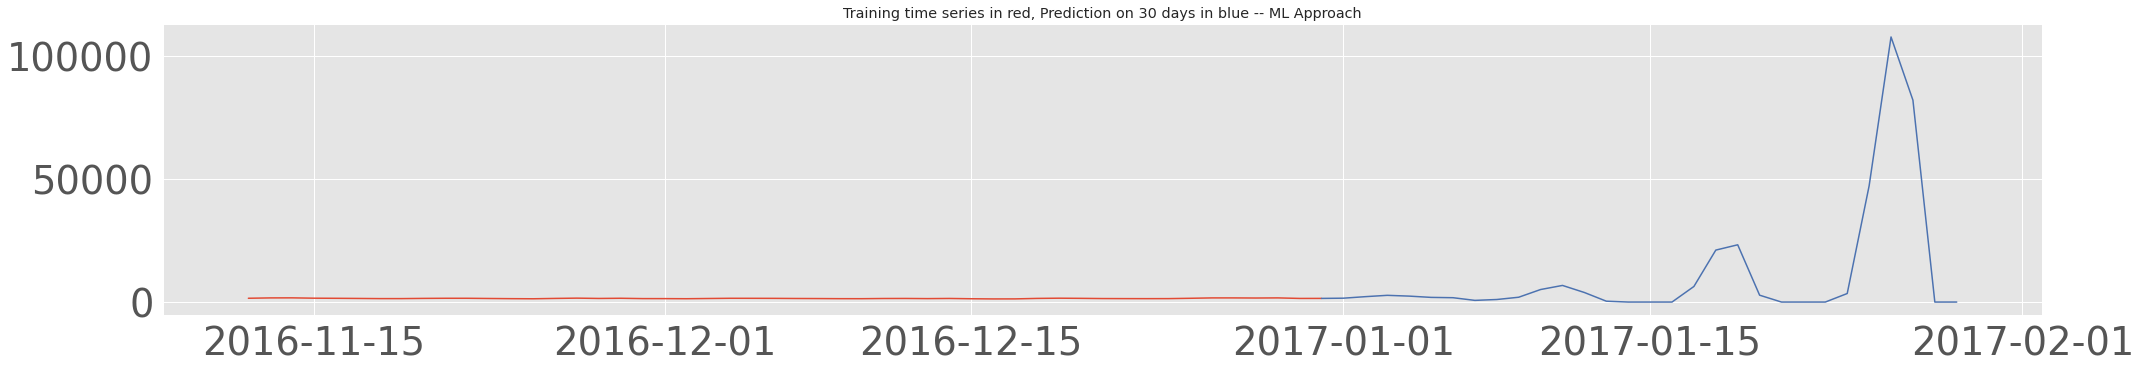

In [ ]:
df_lagged = lagged_linear[['Visits','date']]
df_train = df_lagged[df_lagged['date'] <= last_date]
df_pred = df_lagged[df_lagged['date'] >= last_date]
plt.style.use('ggplot')
plt.figure(figsize=(30, 5))
plt.plot(df_train.date,df_train.Visits)
plt.plot(df_pred.date,df_pred.Visits,color='b')
plt.title('Training time series in red, Prediction on 30 days in blue -- ML Approach')
plt.show()


# Mathematical Approach

Use the average of the activity by weekdays.

In [ ]:
lagged_basic = lagged_adaboost[['date','Visits','weekday']]
lagged_basic_tr   = lagged_basic[lagged_basic['date'] < last_date]
lagged_basic_pred = lagged_basic[lagged_basic['date'] >= last_date]
lagged_basic_pred.drop('Visits',inplace=True,axis=1)


In [ ]:
prediction_by_days = pd.DataFrame(lagged_basic.groupby(['weekday'])['Visits'].mean())
prediction_by_days.reset_index(drop=False,inplace=True)
prediction_by_days

,weekday,Visits
0,0.0,1613.573222
1,1.0,1597.393782
2,2.0,1549.115941
3,3.0,1518.968685
4,4.0,1461.408287
5,5.0,1490.224871
6,6.0,1576.416959


### Finding Error Rate

In [ ]:
lagged_basic_tr

,date,Visits,weekday
0,2016-11-12,1536.471757,5.0
1,2016-11-13,1679.630589,6.0
2,2016-11-14,1701.941831,0.0
3,2016-11-15,1564.172228,1.0
4,2016-11-16,1520.673959,2.0
5,2016-11-17,1463.751937,3.0
6,2016-11-18,1396.544145,4.0
7,2016-11-19,1399.170412,5.0
8,2016-11-20,1482.018739,6.0
9,2016-11-21,1529.844585,0.0


In [ ]:
test_date_begins = lagged_basic_tr["date"][int(len(lagged_basic_tr)*.70)]
test_date_begins


Timestamp('2016-12-16 00:00:00')

In [ ]:
lagged_basic_test = lagged_basic_tr[lagged_basic_tr['date'] >= test_date_begins]
lagged_basic_actual_test_value = lagged_basic_test.iloc[:, 1]
lagged_basic_test.drop('Visits',inplace=True,axis=1)
lagged_basic_test

,date,weekday
34,2016-12-16,4.0
35,2016-12-17,5.0
36,2016-12-18,6.0
37,2016-12-19,0.0
38,2016-12-20,1.0
39,2016-12-21,2.0
40,2016-12-22,3.0
41,2016-12-23,4.0
42,2016-12-24,5.0
43,2016-12-25,6.0


In [ ]:
basic_test_pred = pd.merge(lagged_basic_test,prediction_by_days,on='weekday')
basic_test_pred

,date,weekday,Visits
0,2016-12-16,4.0,1461.408287
1,2016-12-23,4.0,1461.408287
2,2016-12-30,4.0,1461.408287
3,2016-12-17,5.0,1490.224871
4,2016-12-24,5.0,1490.224871
5,2016-12-18,6.0,1576.416959
6,2016-12-25,6.0,1576.416959
7,2016-12-19,0.0,1613.573222
8,2016-12-26,0.0,1613.573222
9,2016-12-20,1.0,1597.393782


In [ ]:
lagged_basic_prediction_test_value = basic_test_pred.iloc[:, 2]
lagged_basic_prediction_test_value

0     1461.408287
1     1461.408287
2     1461.408287
3     1490.224871
4     1490.224871
5     1576.416959
6     1576.416959
7     1613.573222
8     1613.573222
9     1597.393782
10    1597.393782
11    1549.115941
12    1549.115941
13    1518.968685
14    1518.968685
Name: Visits, dtype: float64

In [ ]:
lagged_basic_actual_test_value.reset_index(drop = True, inplace = True)
lagged_basic_actual_test_value

0     1265.571850
1     1280.523597
2     1474.682207
3     1561.789931
4     1501.701358
5     1418.063070
6     1394.095503
7     1377.481718
8     1393.099208
9     1523.739922
10    1679.606554
11    1678.301870
12    1633.965605
13    1684.307717
14    1467.943378
Name: Visits, dtype: float64

In [ ]:
r2 = r2_score(lagged_basic_actual_test_value.to_numpy(), lagged_basic_prediction_test_value.to_numpy())
mae = mean_absolute_error(lagged_basic_actual_test_value.to_numpy(), lagged_basic_prediction_test_value.to_numpy())
smape_value = smape(lagged_basic_actual_test_value.to_numpy(), lagged_basic_prediction_test_value.to_numpy())
print ("-----------------------------------------------")
print ("mae with 70% of the data to train:", mae)
print ("-----------------------------------------------")
print ("r2 with 70% of the data to train:", r2)
print ("-----------------------------------------------")
print ("smape with 70% of the data to train:", smape_value)
print ("-----------------------------------------------")

-----------------------------------------------
mae with 70% of the data to train: 123.76960144961821
-----------------------------------------------
r2 with 70% of the data to train: -0.14001972620097436
-----------------------------------------------
smape with 70% of the data to train: 8.269041799529685
-----------------------------------------------


### Predicting New Values for Next 30 Days

In [ ]:
basic_pred = pd.merge(lagged_basic_pred,prediction_by_days,on='weekday')
basic_approach = pd.concat([lagged_basic_tr,basic_pred])

In [ ]:
plot_basic = np.array(basic_approach[basic_approach['date'] > last_date].sort_values(by='date').Visits)

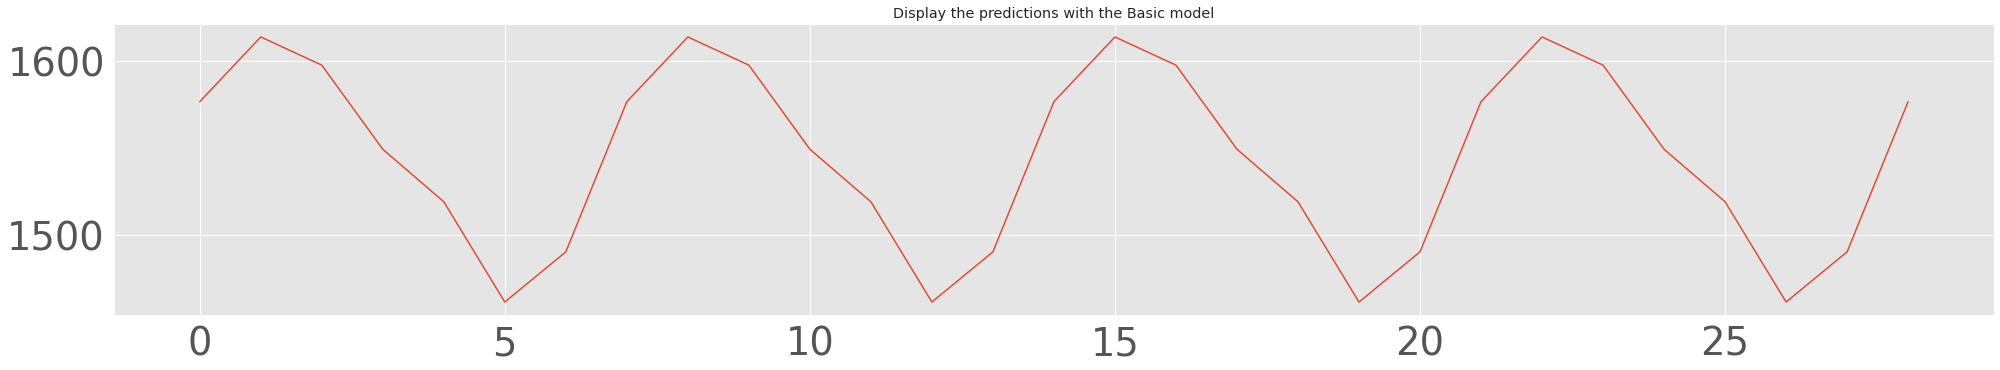

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(plot_basic)
plt.title('Display the predictions with the Basic model')
plt.show()

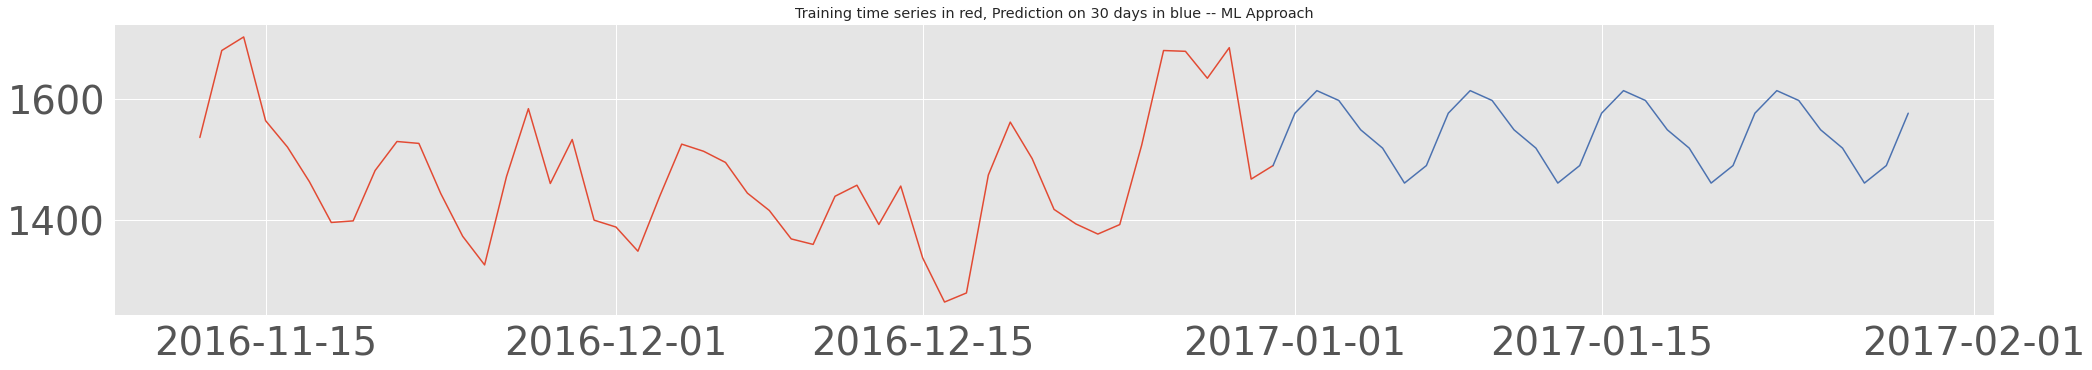

In [ ]:
df_lagged = basic_approach[['Visits','date']].sort_values(by='date')
df_train = df_lagged[df_lagged['date'] <= last_date]
df_pred = df_lagged[df_lagged['date'] >= last_date]
plt.style.use('ggplot')
plt.figure(figsize=(30, 5))
plt.plot(df_train.date,df_train.Visits)
plt.plot(df_pred.date,df_pred.Visits,color='b')
plt.title('Training time series in red, Prediction on 30 days in blue -- ML Approach')
plt.show()


# ARIMA

## Show Rolling mean, Rolling Std and Test for the stationnarity


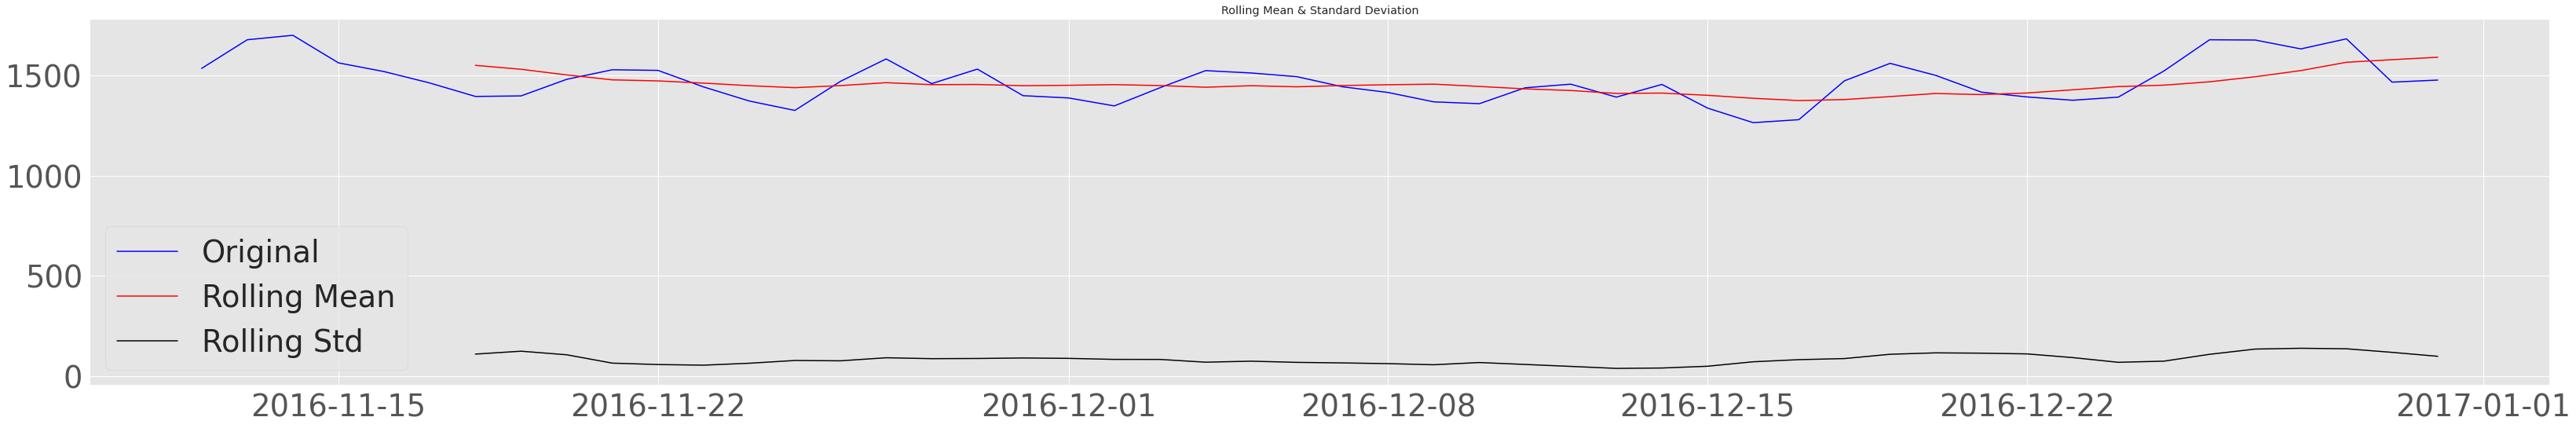

Results of Dickey-Fuller Test:
Test Statistic                 -4.292839
p-value                         0.000457
#Lags Used                      1.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


In [ ]:
df_date_index = times_series_means[['date','Visits']].set_index('date')

def test_stationarity(timeseries):
    plt.figure(figsize=(50, 8))
    rolmean = timeseries.rolling( window=7).mean()

    rolstd = timeseries.rolling(window=7).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = sm.tsa.adfuller(timeseries['Visits'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_stationarity(df_date_index)

In [ ]:
df_date_index

,Visits
date,
2016-11-12,1536.471757
2016-11-13,1679.630589
2016-11-14,1701.941831
2016-11-15,1564.172228
2016-11-16,1520.673959
2016-11-17,1463.751937
2016-11-18,1396.544145
2016-11-19,1399.170412
2016-11-20,1482.018739


Our Time Series is stationary. We can apply the ARIMA Model without transformations.

## Applying ARIMA MODEL

In [ ]:
data = pd.melt(train[list(train.columns[-100:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')


In [ ]:
data = data.dropna()

In [ ]:
data.shape

(14058160, 3)

In [ ]:
data = data[['Page','date','Visits']].groupby(['date'])['Visits'].mean()


In [ ]:
data.shape

(100,)

In [ ]:
data

date
2016-09-23    1358.139593
2016-09-24    1314.132128
2016-09-25    1443.174317
2016-09-26    1475.678637
2016-09-27    1472.014139
                 ...     
2016-12-27    1678.301870
2016-12-28    1633.965605
2016-12-29    1684.307717
2016-12-30    1467.943378
2016-12-31    1478.282137
Name: Visits, Length: 100, dtype: float64

### Finding Error Rate

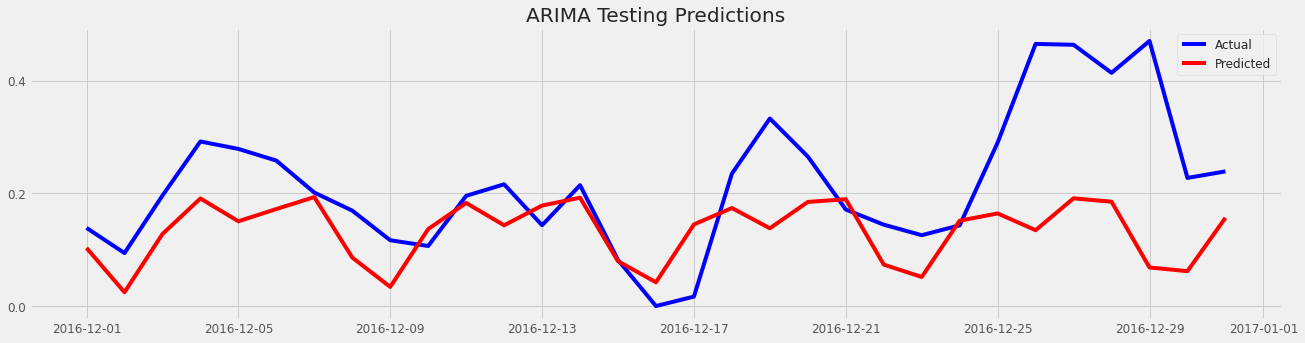

-----------------------------------------------
mae with 70% of the data to train: 0.10069426066895787
-----------------------------------------------
r2 with 70% of the data to train: -0.35185606414271065
-----------------------------------------------
smape with 70% of the data to train: 61.880285130998345
-----------------------------------------------


In [ ]:
def Arima(data, p, d, q, test_days, visualize_predictions=False):

    train_date = data[:-31]
    test_date = data[-31:]

    data = data.astype('float')
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    train = scaled_data[:-31]
    test = scaled_data[-31:]


    train = pd.Series(train.reshape(len(train)), index=pd.to_datetime(train_date.index))
    test = pd.Series(test.reshape(len(test)), index=pd.to_datetime(test_date.index))

    arima = ARIMA(train, order=[p, d, q])
    model = arima.fit()

    test_start = len(train)
    test_end = len(train) + len(test) - 1
    test_pred = model.predict(start=test_start, end=test_end, typ='levels')
    if visualize_predictions:
        plt.style.use('fivethirtyeight')
        plt.figure(figsize = (20, 5))
        actual = plt.plot(test, color='blue', label='Actual')
        predicted = plt.plot(test_pred, color='red', label='Predicted')
        plt.title('ARIMA Testing Predictions')
        plt.legend(fontsize=12)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)


        plt.show()

    r2 = r2_score(test, test_pred)
    mae = mean_absolute_error(test, test_pred)
    smape_value = smape(test, test_pred)
    print ("-----------------------------------------------")
    print ("mae with 70% of the data to train:", mae)
    print ("-----------------------------------------------")
    print ("r2 with 70% of the data to train:", r2)
    print ("-----------------------------------------------")
    print ("smape with 70% of the data to train:", smape_value)
    print ("-----------------------------------------------")

    return model
model = Arima(data, 5, 1, 5, 31, visualize_predictions=True)


### Predicting New Values for Next 30 days

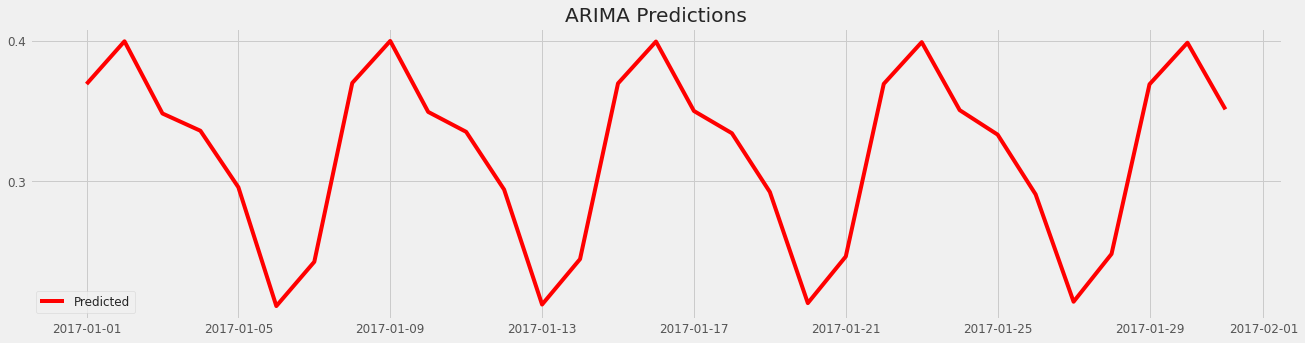

In [ ]:
 def Arima_predict(data, p, d, q, test_days, visualize_predictions=False):

    train_date = data[0:]

    data = data.astype('float')
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    train = scaled_data[0:]

    train = pd.Series(train.reshape(len(train)), index=pd.to_datetime(train_date.index))

    arima = ARIMA(train, order=[p, d, q])
    model = arima.fit()

    test_start = len(train)
    test_end = len(train) + 30
    test_pred = model.predict(start=test_start, end=test_end, typ='levels')

    if visualize_predictions:
        style.use('fivethirtyeight')
        plt.figure(figsize=(20, 5))
        predicted = plt.plot(test_pred, color='red', label='Predicted')
        plt.title('ARIMA Predictions')
        plt.legend(fontsize=12)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()
    return model

model = Arima_predict(data, 5, 1, 5, 31, visualize_predictions=True)
